In [1]:
%pylab inline
from mba import *

Populating the interactive namespace from numpy and matplotlib


# An example of layered data interpolationg
### Source function and scattered data locations

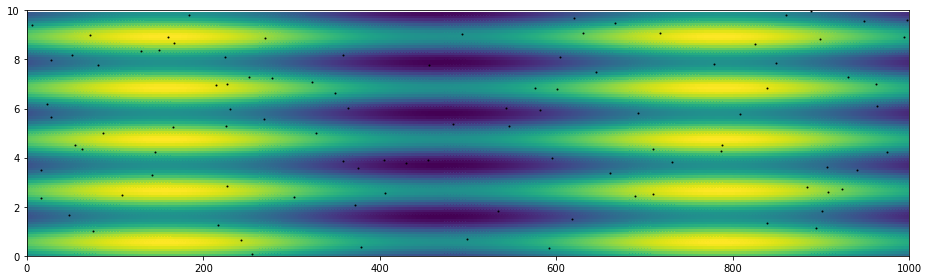

In [2]:
def foo(c):
    return sin(c[0]/100) + sin(c[1]*3)

cmin = [0.0, 0.0]
cmax = [1000.0, 10.0]

C = mgrid[0:cmax[0]:1e-1,0:cmax[1]:1e-1]
F = foo(C)

coo = uniform(cmin, cmax, (100,2))
val = foo(coo.transpose())

figure(figsize=(13,4))
pcolormesh(C[0], C[1], F)
scatter(coo[:,0], coo[:,1], c='k', s=1)
xlim([cmin[0], cmax[0]])
ylim([cmin[1], cmax[1]])
gca().set_aspect('auto')
tight_layout()

Size of the target grid:

In [3]:
C.shape[1:]

(10000, 100)

### Results depend on the grid size along the long (horizontal) axis

Reduction in horizontal grid size leads to more layered results:

level 1: initial approximation
level 2: dense  [63, 63] (31752 bytes)
level 3: sparse [123, 123] (37032 bytes, compression: 0.31)
level 4: sparse [243, 243] (38328 bytes, compression: 0.08)
level 5: sparse [483, 483] (38400 bytes, compression: 0.02)

level 1: initial approximation
level 2: dense  [59, 123] (58056 bytes)
level 3: sparse [115, 243] (37680 bytes, compression: 0.17)
level 4: sparse [227, 483] (38304 bytes, compression: 0.04)

level 1: initial approximation
level 2: dense  [27, 123] (26568 bytes)
level 3: sparse [51, 243] (36216 bytes, compression: 0.37)
level 4: sparse [99, 483] (38016 bytes, compression: 0.10)
level 5: sparse [195, 963] (38400 bytes, compression: 0.03)



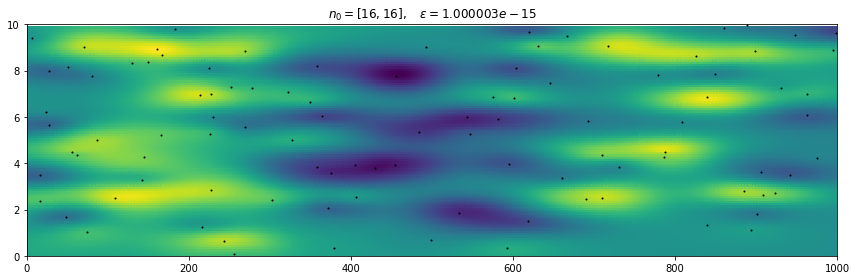

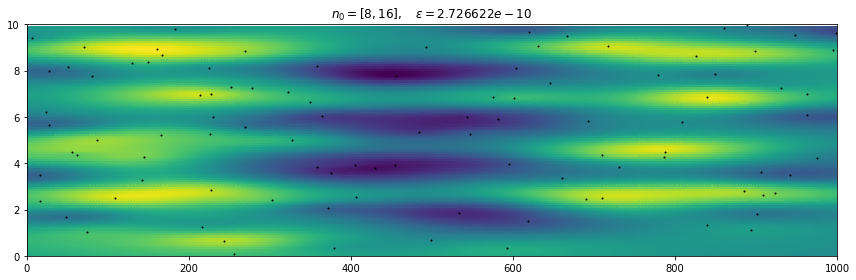

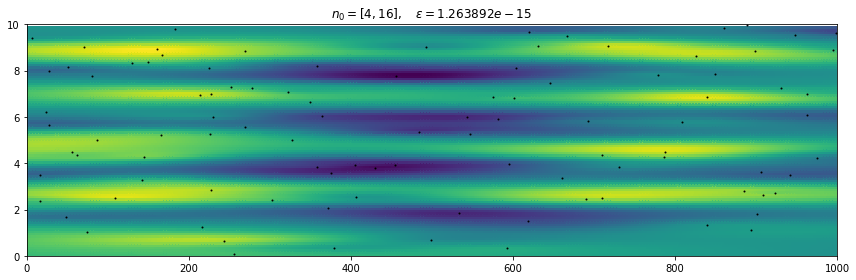

In [4]:
ny = 16
for nx in (16, 8, 4):
    interp = mba2(cmin, cmax, [nx,ny], coo, val)
    error = amax(abs(val - interp(coo))) / amax(abs(val))
    print(interp)

    figure(figsize=(12,4))
    G = interp(C.transpose().copy())
    pcolormesh(C[0], C[1], G.transpose())
    scatter(coo[:,0], coo[:,1], c='k', s=1)
    xlim([cmin[0], cmax[0]])
    ylim([cmin[1], cmax[1]])
    gca().set_aspect('auto')
    title(f'$n_0=[{nx},{ny}], \\quad \\varepsilon={error:e}$')
    tight_layout()

### Increasing vertical grid size

level 1: initial approximation
level 2: dense  [63, 63] (31752 bytes)
level 3: sparse [123, 123] (37032 bytes, compression: 0.31)
level 4: sparse [243, 243] (38328 bytes, compression: 0.08)
level 5: sparse [483, 483] (38400 bytes, compression: 0.02)

level 1: initial approximation
level 2: dense  [63, 127] (64008 bytes)
level 3: sparse [123, 251] (37752 bytes, compression: 0.15)
level 4: sparse [243, 499] (38352 bytes, compression: 0.04)

level 1: initial approximation
level 2: dense  [33, 129] (34056 bytes)
level 3: sparse [63, 255] (36888 bytes, compression: 0.29)
level 4: sparse [123, 507] (38208 bytes, compression: 0.08)
level 5: sparse [243, 1011] (38400 bytes, compression: 0.02)



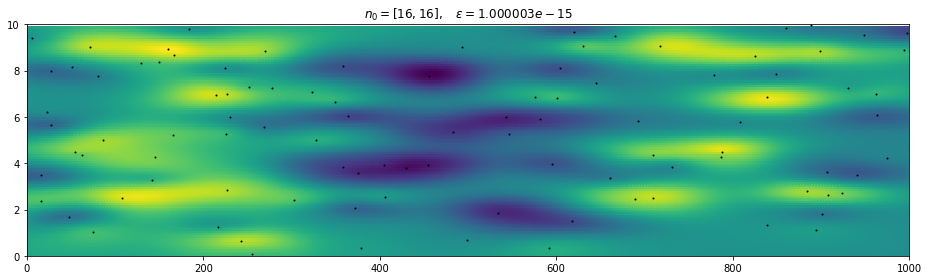

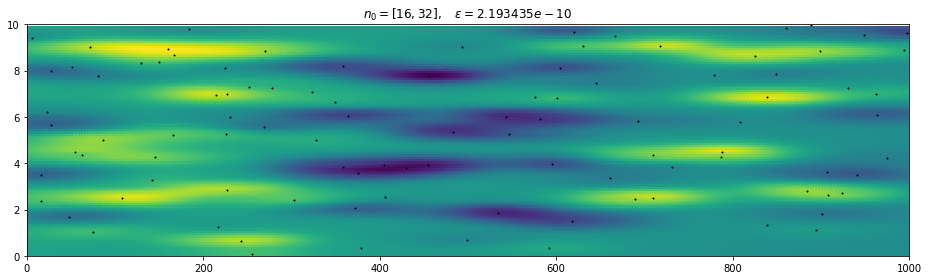

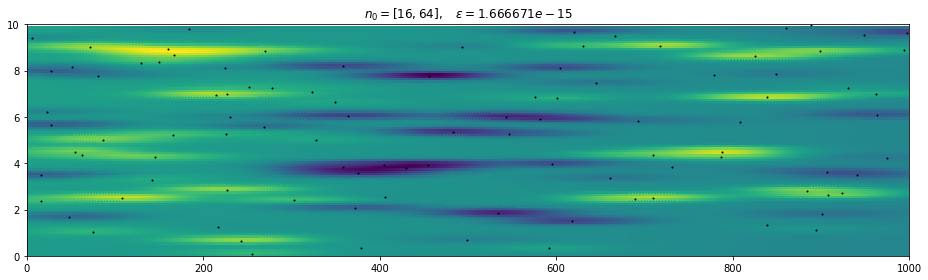

In [5]:
nx = 16
for ny in (16, 32, 64):
    interp = mba2(cmin, cmax, [nx,ny], coo, val)
    error = amax(abs(val - interp(coo))) / amax(abs(val))
    print(interp)

    figure(figsize=(13,4))
    G = interp(C.transpose().copy())
    pcolormesh(C[0], C[1], G.transpose())
    scatter(coo[:,0], coo[:,1], c='k', s=1)
    xlim([cmin[0], cmax[0]])
    ylim([cmin[1], cmax[1]])
    gca().set_aspect('auto')
    title(f'$n_0=[{nx},{ny}], \\quad \\varepsilon={error:e}$')
    tight_layout()